In [39]:
from multiglm.experiments.experiment import load_experiment
from multiglm.visualizations.model_visualizer import *

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Binary Model Comparisons

In [33]:
mvc_base = ModelVisualizerCompare(
    load_experiment("2024_03_26_compare_binary_base_features.pkl")
)
mvc_disengage = ModelVisualizerCompare(
    load_experiment("2024_03_26_compare_binary_disengaged_features.pkl")
)

In [34]:
base_bits = mvc_base.compute_bits_per_trial_df().query(
    "model_type != 'prev_stim_no_viol_mask'"
)
disengaged_bits = mvc_disengage.compute_bits_per_trial_df().query(
    "model_type != 'base'"
)
combined_df = pd.concat([base_bits, disengaged_bits])

In [35]:
combined_df.model_name.unique()

array(['null', 'prev_choice', 'prev_correct', 'prev_stim_no_viol_mask',
       'prev_stim_viol_mask', 'stimuli', 'base', 'prev_tns',
       'prev_tns_stim_intrxs', 'prev_viol_stim_intrxs',
       'prev_violation_filt'], dtype=object)

In [36]:
ORDER = [
    "stimuli",
    "prev_stim_viol_mask",
    "prev_correct",
    "prev_choice",
    "prev_violation_filt",
    "prev_tns",
    "prev_viol_stim_intrxs",
    "prev_tns_stim_intrxs",
]

Text(0, 0.5, 'Bits/Trial')

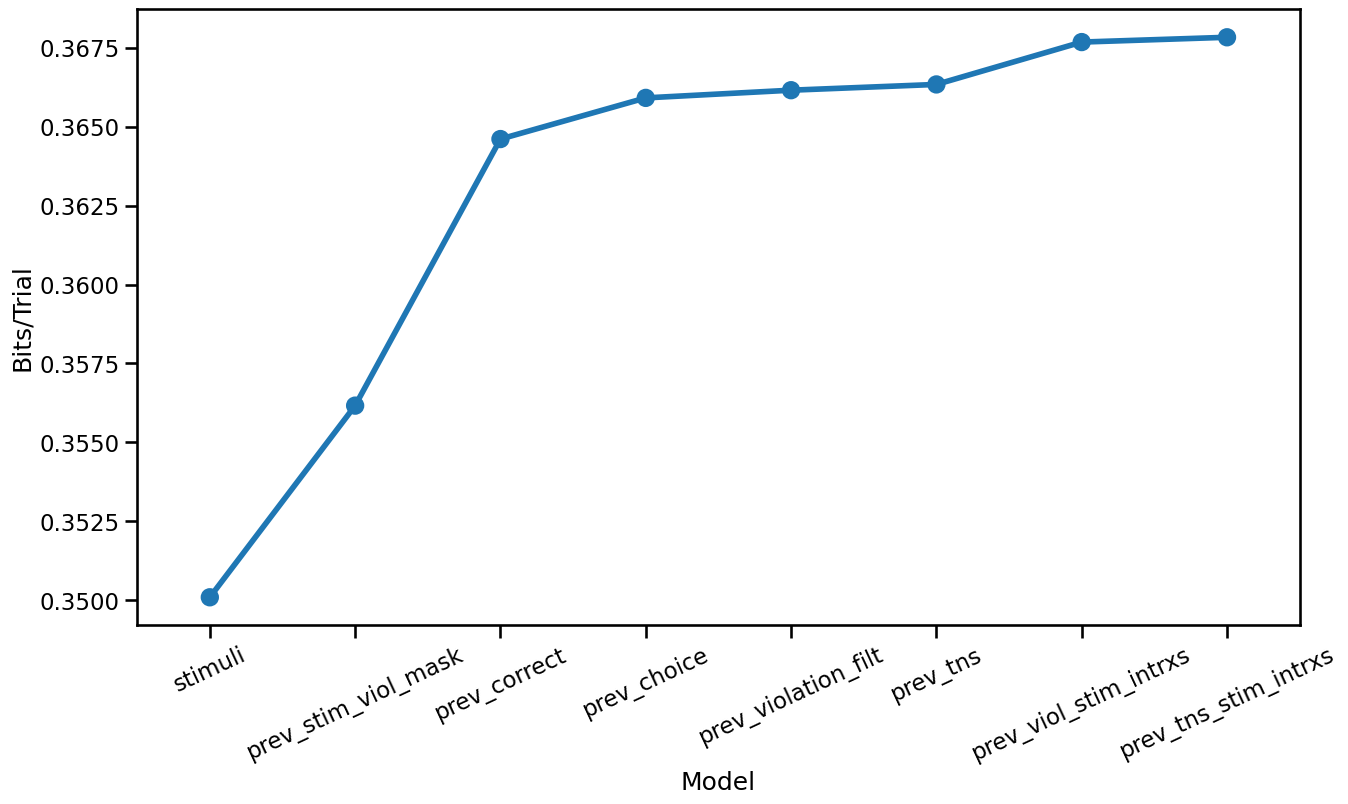

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.pointplot(
    data=combined_df.query("model_name != 'null'"),
    x="model_name",
    y="bits_per_trial",
    hue=None,
    ax=ax,
    errorbar=None,
    order=ORDER,
)

plt.xlabel("Model")
plt.xticks(rotation=25)
plt.ylabel("Bits/Trial")

Text(0, 0.5, 'Bits/Trial')

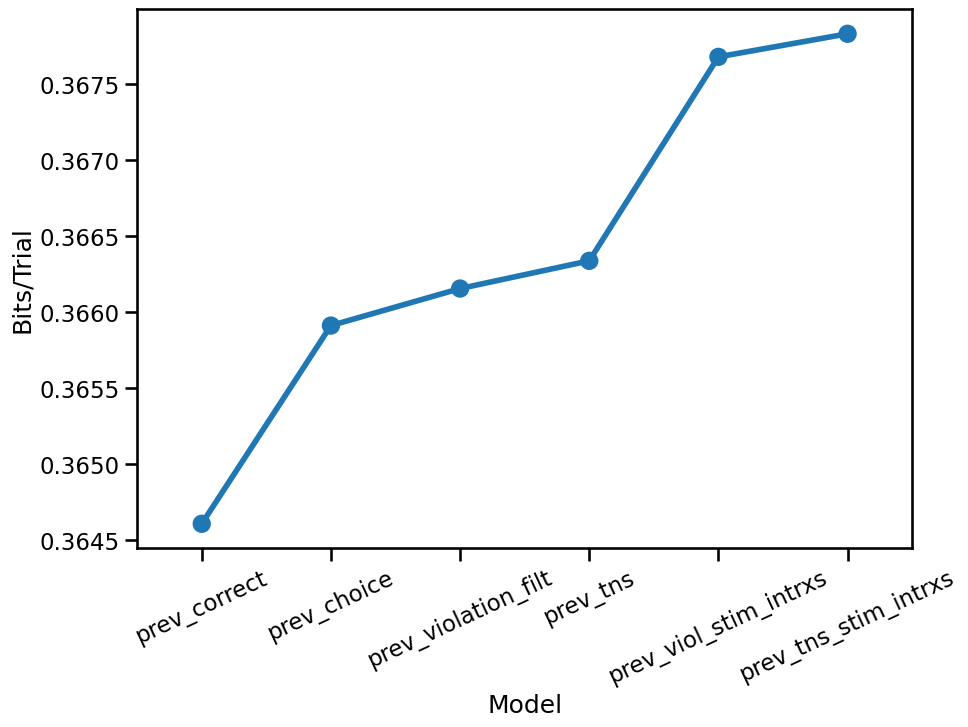

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.pointplot(
    data=combined_df.query("model_name != 'null'"),
    x="model_name",
    y="bits_per_trial",
    hue=None,
    ax=ax,
    errorbar=None,
    order=ORDER[2:],
)

plt.xlabel("Model")
plt.xticks(rotation=25)``
plt.ylabel("Bits/Trial")